# Read Raw Images

### Results:
on VCM cameras, both nvgstcapture-1.0 and v4l2-ctl fail.
command: 

on EVETAR cameras, v4l2-ctl can capture RG10.

In [1]:
import numpy as np
import subprocess
import glob
import skimage.io as imio
import re
from skimage.color import rgb2gray
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_raw(fileName, frame = 1, rows = 2160, runL = 3840):
    
    rIm=np.fromfile(fileName,dtype=np.dtype('i2'))
    print("len(rIm)", len(rIm))
    
    rIm=np.reshape(rIm[:frame*rows*runL],(frame, rows,runL))

    return rIm

len(rIm) 405442304


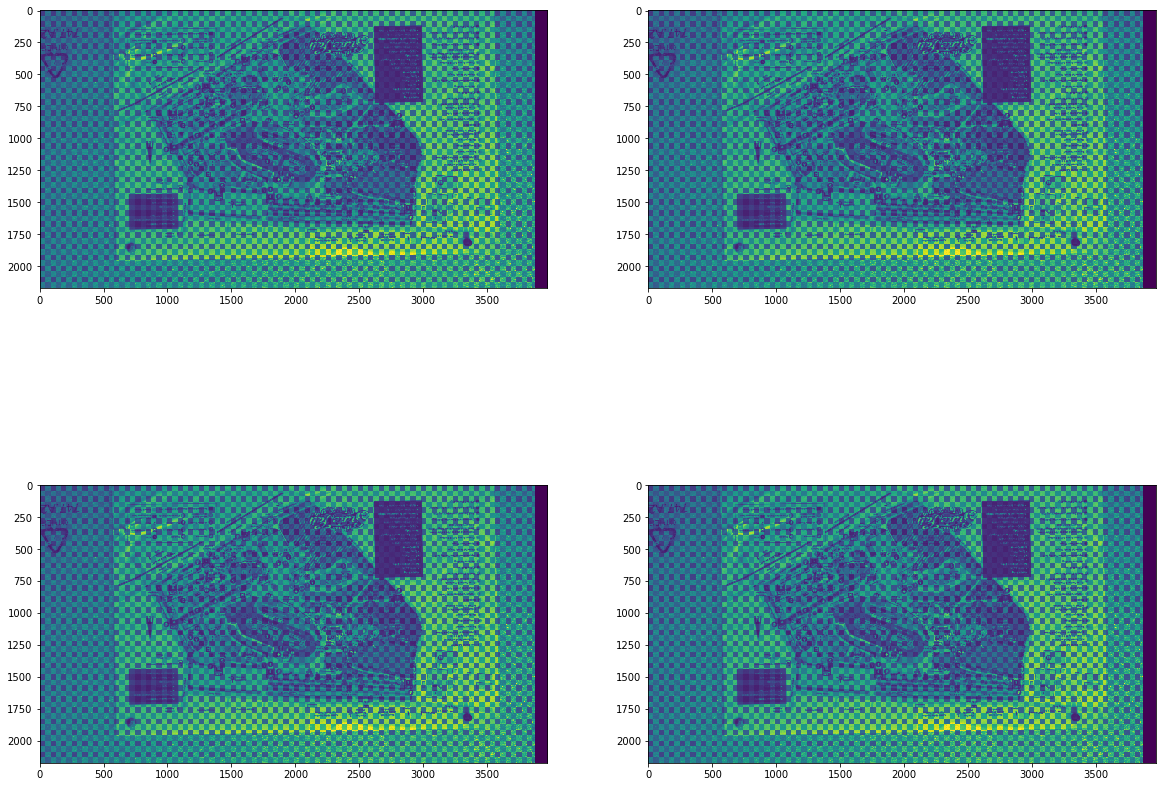

In [8]:
rIm=read_raw("highlight_frame47_rg10.raw", 
             frame = 47, rows=1087*2, runL=3968)

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(rIm[0])
ax[0][1].imshow(rIm[13])
ax[1][0].imshow(rIm[37])
ax[1][1].imshow(rIm[46])
plt.show()

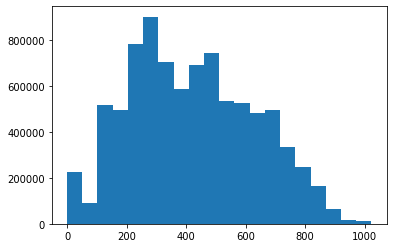

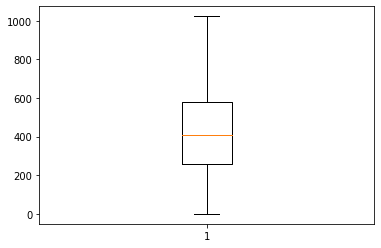

In [9]:
plt.hist(rIm[0].flatten(), bins = 20)
plt.show()
plt.boxplot(rIm[0].flatten())
plt.show()

In [10]:
print("rIm[0].max():", rIm[0].max(), "rIm[0].min():", rIm[0].min(),"rIm[0].mean():", rIm[0].mean())

rIm[0].max(): 1023 rIm[0].min(): 0 rIm[0].mean(): 421.79529752277654


In [11]:
rIm[0][rIm[0] > 0].min()

65